In [1]:
import pandas as pd

csv_file_group = r"C:\Users\ricewater\Documents\CTITTP\ATTACK Excel sheets\enterprise-attack-v15.1-groups.xlsx"
# Load the second sheet ('techniques used') containing techniques observed among apt groups
df_group = pd.read_excel(csv_file_group, sheet_name='groups')

# Extract the unique IDs from the first sheet (universe of techniques)
observed_group_ids_enterprise = df_group['ID'].unique()
print(len(observed_group_ids_enterprise))


148


In [2]:
csv_file_mobile = r"C:\Users\ricewater\Documents\CTITTP\ATTACK Excel sheets\mobile-attack-v15.1-groups.xlsx"
# Load the second sheet ('techniques used') containing techniques observed among apt groups
df_mobile = pd.read_excel(csv_file_mobile, sheet_name='groups')

observed_group_ids_mobile = df_mobile['ID'].unique()
print(observed_group_ids_mobile)

['G1028' 'G0007' 'G1002' 'G0097' 'G0142' 'G0070' 'G1006' 'G1019' 'G0056'
 'G0034' 'G1015' 'G1029' 'G0112']


In [3]:
csv_file_ics = r"C:\Users\ricewater\Documents\CTITTP\ATTACK Excel sheets\ics-attack-v15.1-groups.xlsx"
# Load the second sheet ('techniques used') containing techniques observed among apt groups
df_ics = pd.read_excel(csv_file_ics, sheet_name='groups')

observed_group_ids_ics = df_ics['ID'].unique()
print(observed_group_ids_ics)

['G1000' 'G0064' 'G0082' 'G1027' 'G0035' 'G0037' 'G0046' 'G0115' 'G1001'
 'G0032' 'G0049' 'G0034' 'G0088' 'G0102']


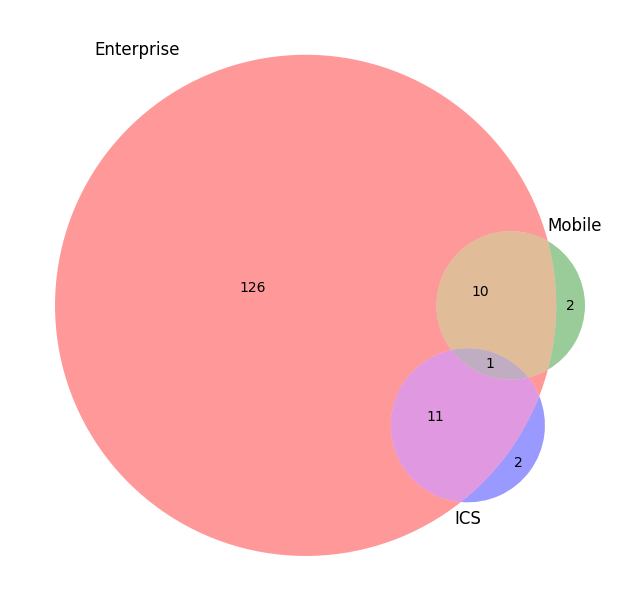

In [7]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Convert lists to sets for easier manipulation
enterprise_set = set(observed_group_ids_enterprise)
mobile_set = set(observed_group_ids_mobile)
ics_set = set(observed_group_ids_ics)
# Create a Venn diagram with 3 sets
plt.figure(figsize=(8, 8))
venn = venn3([enterprise_set, mobile_set, ics_set], ('Enterprise', 'Mobile', 'ICS'))

# Display the plot
#plt.title("Venn Diagram of Group IDs across Enterprise, Mobile, and ICS")
plt.savefig("venn_diagram_groups.pdf", format='pdf')
plt.show()


In [9]:
# Find techniques that are in all three sets (intersection)
groups_in_all_three = enterprise_set & mobile_set & ics_set

# Find techniques that are only in mobile (difference with enterprise and ICS)
groups_only_in_mobile = mobile_set - (enterprise_set | ics_set)

# Find techniques that are only in ICS (difference with enterprise and mobile)
groups_only_in_ics = ics_set - (enterprise_set | mobile_set)

# Output the results
print("Groups in all three categories (Enterprise, Mobile, ICS):")
print(techniques_in_all_three)

print("Groups only in Mobile (not in Enterprise or ICS):")
print(techniques_only_in_mobile)

print("Groups only in ICS (not in Enterprise or Mobile):")
print(techniques_only_in_ics)


Groups in all three categories (Enterprise, Mobile, ICS):
{'G0034'}
Groups only in Mobile (not in Enterprise or ICS):
{'G1029', 'G0097'}
Groups only in ICS (not in Enterprise or Mobile):
{'G1027', 'G1000'}


In [11]:
import pandas as pd

# Load the first sheet ('techniques') containing the universe of all techniques
csv_file = r"C:\Users\ricewater\Documents\CTITTP\ATTACK Excel sheets\enterprise-attack-v15.1-techniques.xlsx"
df1 = pd.read_excel(csv_file, sheet_name='techniques')

csv_file1 = r"C:\Users\ricewater\Documents\CTITTP\ATTACK Excel sheets\enterprise-attack-v15.1-groups.xlsx"
# Load the second sheet ('techniques used') containing techniques observed among apt groups
df2 = pd.read_excel(csv_file1, sheet_name='techniques used')

# Extract both 'ID' and 'name' from the first sheet
all_techniques = df1[['ID', 'name']]

# Extract the target IDs from the second sheet (observed techniques)
observed_technique_ids = df2['target ID'].unique()

# Find the techniques not observed (IDs in df1 but not in df2)
unobserved_techniques = all_techniques[~all_techniques['ID'].isin(observed_technique_ids)]

# Calculate statistics
total_techniques = len(all_techniques)
observed_techniques = total_techniques - len(unobserved_techniques)
unobserved_techniques_count = len(unobserved_techniques)

# Output the stats
print(f"Total techniques reported by MITRE: {total_techniques}")
print(f"Total techniques observed in APT groups: {observed_techniques}")
print(f"Techniques not covered by the APT groups: {unobserved_techniques_count}")

# Adjust pandas settings to display more rows and full content
pd.set_option('display.max_rows', 35)  # Set the max number of rows to display
#pd.set_option('display.max_colwidth', None)  # Display full column content without truncation

# Display the first 25 techniques (ID and name) that are not observed
print("\nTechniques not observed (ID and name):")
print(unobserved_techniques.head(35))


Total techniques reported by MITRE: 637
Total techniques observed in APT groups: 421
Techniques not covered by the APT groups: 216

Techniques not observed (ID and name):
           ID                                               name
0       T1548                  Abuse Elevation Control Mechanism
2   T1548.004  Abuse Elevation Control Mechanism: Elevated Ex...
3   T1548.001  Abuse Elevation Control Mechanism: Setuid and ...
4   T1548.003  Abuse Elevation Control Mechanism: Sudo and Su...
5   T1548.006  Abuse Elevation Control Mechanism: TCC Manipul...
6   T1548.005  Abuse Elevation Control Mechanism: Temporary E...
10  T1134.004     Access Token Manipulation: Parent PID Spoofing
11  T1134.005   Access Token Manipulation: SID-History Injection
20  T1098.001  Account Manipulation: Additional Cloud Credent...
22  T1098.006  Account Manipulation: Additional Container Clu...
26      T1650                                     Acquire Access
28  T1583.005                     Acquire Infrast

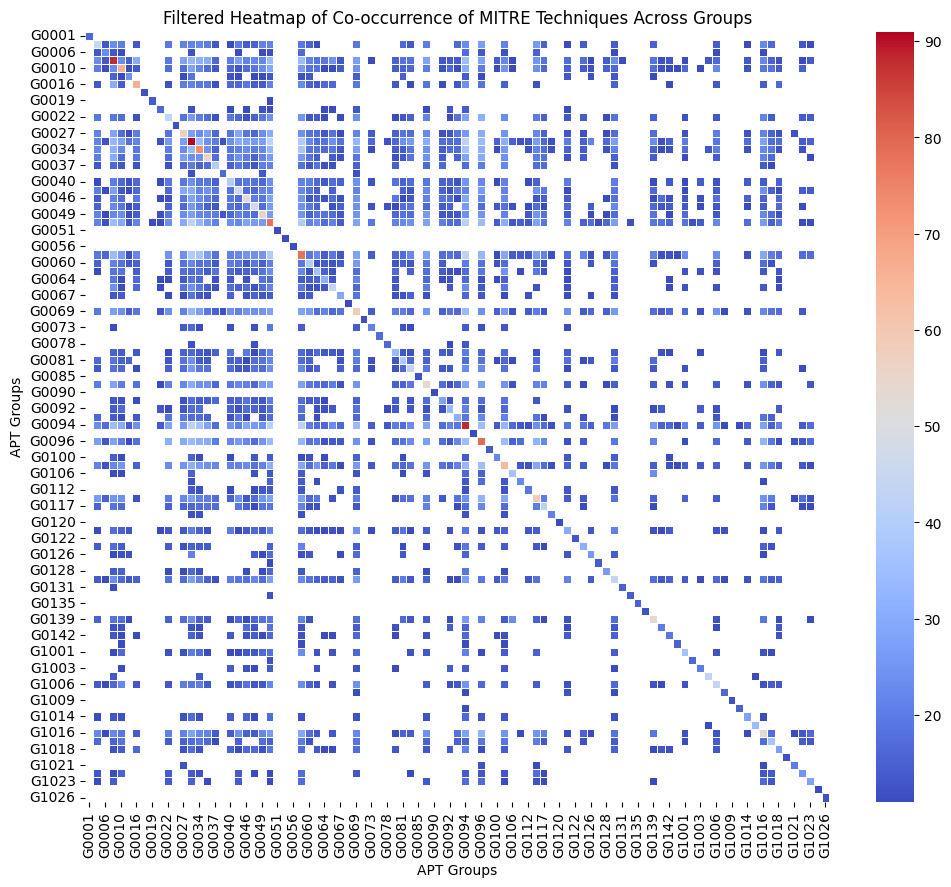

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Read the Excel sheet into a DataFrame
file_path = r"C:\Users\ricewater\Documents\CTITTP\ATTACK Excel sheets\enterprise-attack-v15.1-groups.xlsx"
sheet_name = 'techniques used'

# Load the data
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Step 2: Group techniques by "Source ID"
grouped_techniques = df.groupby('source ID')['target ID'].apply(set)

# Step 3: Initialize an empty co-occurrence matrix
group_ids = grouped_techniques.index
cooccurrence_matrix = pd.DataFrame(0, index=group_ids, columns=group_ids)

# Step 4: Fill the co-occurrence matrix with counts of similar techniques
for group_a in group_ids:
    for group_b in group_ids:
        # Find intersection of techniques between group A and group B
        common_techniques = grouped_techniques[group_a] & grouped_techniques[group_b]
        cooccurrence_matrix.loc[group_a, group_b] = len(common_techniques)

# Set a threshold for minimum shared techniques between groups
min_shared_techniques = 10  # You can adjust this threshold

# Filter the co-occurrence matrix to only show groups with a minimum count of shared techniques
filtered_cooccurrence_matrix = cooccurrence_matrix[cooccurrence_matrix > min_shared_techniques].dropna(how='all', axis=0).dropna(how='all', axis=1)

# Plot the filtered heatmap
plt.figure(figsize=(12, 10))

# Use .0f to handle any floats and display whole numbers
sns.heatmap(filtered_cooccurrence_matrix, annot=False, fmt='.0f', cmap='coolwarm', linewidths=0.5)
plt.title('Filtered Heatmap of Co-occurrence of MITRE Techniques Across Groups')
plt.xlabel('APT Groups')
plt.ylabel('APT Groups')

# Save the plot
#plt.savefig("filtered_technique_cooccurrence_heatmap.pdf", format='pdf')
plt.show()



In [9]:
# Loop through each row in the DataFrame and print it
for index, value in grouped_techniques.items():
    print(f"Source ID: {index}\nTechniques: {value}\n")


Source ID: G0001
Techniques: {'T1553', 'T1078', 'T1566', 'T1583.002', 'T1546.008', 'T1563.002', 'T1190', 'T1189', 'T1021.001', 'T1560', 'T1003', 'T1584.005', 'T1001.002', 'T1583.003', 'T1005', 'T1203'}

Source ID: G0002
Techniques: {'T1027.001'}

Source ID: G0003
Techniques: {'T1588.002', 'T1557.002', 'T1585.001', 'T1587.001', 'T1003.001'}

Source ID: G0004
Techniques: {'T1114.002', 'T1069.002', 'T1016', 'T1587.001', 'T1071.004', 'T1560.001', 'T1003.003', 'T1140', 'T1021.002', 'T1027', 'T1059.003', 'T1588.002', 'T1543.003', 'T1082', 'T1003.001', 'T1056.001', 'T1560', 'T1558.001', 'T1087.001', 'T1018', 'T1078', 'T1003.002', 'T1083', 'T1041', 'T1059', 'T1036.005', 'T1213.002', 'T1003.004', 'T1036.002', 'T1569.002', 'T1005', 'T1133', 'T1020', 'T1071.001', 'T1057', 'T1007', 'T1087.002', 'T1078.004', 'T1033', 'T1190', 'T1547.001', 'T1049', 'T1105', 'T1614.001', 'T1119'}

Source ID: G0005
Techniques: {'T1102.002', 'T1204.002', 'T1566.001', 'T1568.003', 'T1203'}

Source ID: G0006
Techniques: 